# RAVDESS and EmoDB

## RAVDESS

From: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

- This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. 
- Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

<h3> File naming convention </h3>

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24). Odd numbered actors are male, even numbered actors are female.

Filename example: 03-01-06-01-02-01-12.wav

- Audio-only (03)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) Female, as the actor ID number is even.



In [1]:
#!pip install kagglehub
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import kagglehub
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

## RAVDESS Dataset

# Download dataset from Kaggle
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
print("Path to dataset files:", path)
# List all files in the dataset
print(os.listdir(path))

# Define the dataset directory
ravdess_path = path + "/audio_speech_actors_01-24/**/*.wav"

# Codebook that maps RAVDESS filename encoding to emotions
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Extract emotion labels from filenames
filenames = glob.glob(ravdess_path, recursive=True)
emotions = [emotion_map[os.path.basename(f).split('-')[2]] for f in filenames if os.path.basename(f).split('-')[2] in emotion_map]

rav_db = pd.DataFrame({
    'filename': filenames,
    'label': emotions
})

rav_db.head()

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1
['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'audio_speech_actors_01-24', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


,filename,label
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,fearful
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,fearful
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust


<Axes: title={'center': 'Emotion Distribution in RAVDESS'}, xlabel='label'>

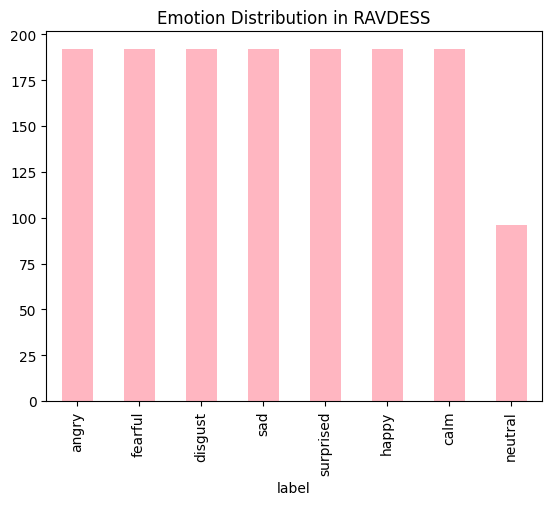

In [2]:
rav_db['label'].value_counts().plot(kind='bar', color='lightpink', title='Emotion Distribution in RAVDESS')


## EmoDB

From: https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb

The EMODB database comprises of seven emotions: 1) anger; 2) boredom; 3) anxiety; 4) happiness; 5) sadness; 6) disgust; and 7) neutral. 

The data was recorded at a 48-kHz sampling rate and then down-sampled to 16-kHz.

Every utterance is named according to the same scheme.

Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).

In [3]:
## EMO-DB Dataset

# Download dataset from Kaggle
path = kagglehub.dataset_download("piyushagni5/berlin-database-of-emotional-speech-emodb")
print("Path to dataset files:", path)

# List all files in the dataset
files = [file_path.name for file_path in os.scandir(path+"/wav") if file_path.is_file()]

# Define the dataset directory
emodb_path = path + "/wav/*.wav"

# Codebook that maps EmoDB filename encoding to emotions
emotion_map = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'fear',
    'F': 'happiness',
    'T': 'sadness',
    'N': 'neutral'
}

# Extract emotion labels from filenames (6th character)
filenames = glob.glob(emodb_path)
emotions = [emotion_map[os.path.basename(f)[5]] for f in filenames if os.path.basename(f)[5] in emotion_map]

# Create a DataFrame to store the emotion labels
emo_db = pd.DataFrame({
    'filename': filenames,
    'label': emotions
})

emo_db.head()


Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1


,filename,label
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,boredom
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,anger
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,anger


<Axes: title={'center': 'Emotion Distribution in EMO-DB'}, xlabel='label'>

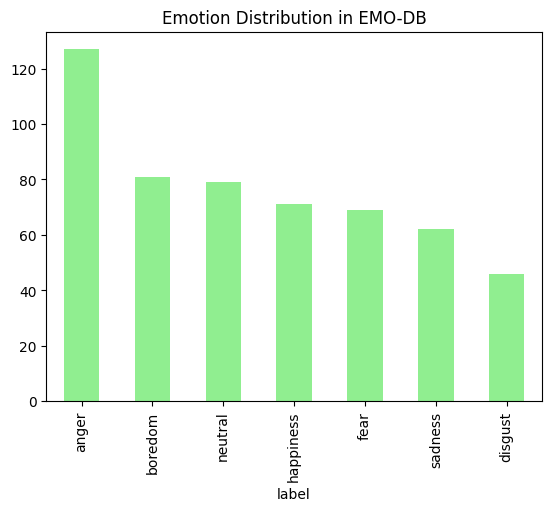

In [4]:
emo_db['label'].value_counts().plot(kind='bar', color='lightgreen', title='Emotion Distribution in EMO-DB')

<Axes: title={'center': 'Emotion Distribution in EmoDB and RAVDESS'}, xlabel='label'>

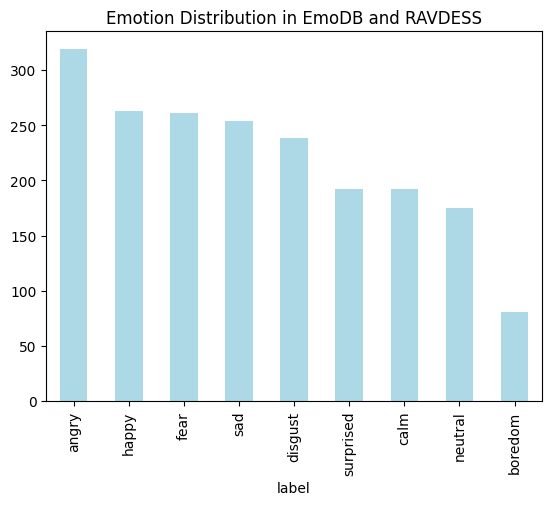

In [5]:

# Combine the two datasets
df_paths = pd.concat([rav_db,emo_db], axis = 0)
df_paths.reset_index(drop=True)

# Fuse labels with similar meanings
df_paths['label'] = df_paths['label'].replace({
    'anger': 'angry',
    'happiness': 'happy',
    'sadness': 'sad',
    'fearful' : 'fear'
})

# Include only the 6 emotions we are interested in
#allowed_emo = ['neutral', 'disgust', 'fear', 'sad', 'happy', 'angry']
#df_paths = df_paths[df_paths['label'].isin(allowed_emo)]

# Plot the distribution of emotions in the combined dataset
df_paths['label'].value_counts().plot(kind='bar', color='lightblue', title='Emotion Distribution in EmoDB and RAVDESS')


In this section, we merged two prominent emotion datasets:  
- **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song)  
- **EmoDB** (Berlin Database of Emotional Speech)

By combining these datasets, we aim to create a comprehensive and diverse dataset that will enhance the performance of our emotion recognition model.

In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)

from src.recognizers import SpeechEmotionRecognizer
import librosa
from tqdm import tqdm
tqdm.pandas()

# Initialize the assistant
ser = SpeechEmotionRecognizer()
# Analyze the dataset
preds = []
for i in tqdm(range(len(df_paths))):
    filename = df_paths['filename'].iloc[i]
    audio, sr = librosa.load(filename, sr=16000)
    pred = ser.analyze(audio, sr)
    preds.append(pred['emotions'][0])
df_paths['pred'] = preds
df_paths.head()

2025-07-10 14:08:53.681378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████| 1975/1975 [04:11<00:00,  7.84it/s]


,filename,label,pred
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,disgust
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,disgust
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,disgust
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,disgust
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust,disgust


In [7]:
# Fuse labels with similar meanings
df_paths['pred'] = df_paths['pred'].replace({
    'anger': 'angry',
    'happiness': 'happy',
    'sadness': 'sad',
    'fearful' : 'fear'
})

print(df_paths['label'].unique())
print(df_paths['pred'].unique())

['angry' 'fear' 'disgust' 'sad' 'surprised' 'happy' 'calm' 'neutral'
 'boredom']
['disgust' 'sad' 'boredom' 'angry' 'fear' 'happy' 'neutral']


In [8]:
df_paths = df_paths[df_paths['label'].isin(['disgust', 'sad', 'boredom', 'angry', 'fear', 'happy', 'neutral'])]
df_paths

,filename,label,pred
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,disgust
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,disgust
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,disgust
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,disgust
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust,disgust
...,...,...,...
530,/Users/sofiafernandes/.cache/kagglehub/dataset...,happy,happy
531,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,fear
532,/Users/sofiafernandes/.cache/kagglehub/dataset...,boredom,boredom
533,/Users/sofiafernandes/.cache/kagglehub/dataset...,boredom,boredom


              precision    recall  f1-score   support

       angry       0.68      0.60      0.64       319
     boredom       0.73      0.89      0.80        81
     disgust       0.24      0.65      0.35       238
        fear       0.84      0.22      0.35       261
       happy       0.75      0.22      0.34       263
     neutral       0.88      0.40      0.55       175
         sad       0.39      0.53      0.45       254

    accuracy                           0.46      1591
   macro avg       0.64      0.50      0.50      1591
weighted avg       0.63      0.46      0.47      1591



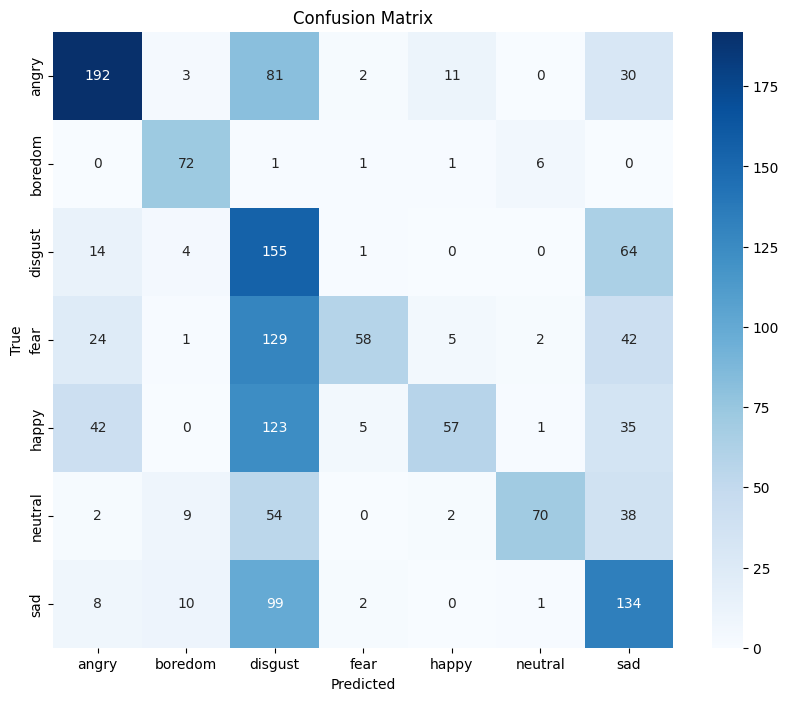

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a classification report
report = classification_report(df_paths['label'], df_paths['pred'])

print(report)
# Generate a confusion matrix
cm = confusion_matrix(df_paths['label'], df_paths['pred'])

emo_order = ['angry', 'boredom', 'disgust', 'fear', 'happy', 'neutral', 'sad']
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emo_order, yticklabels=emo_order)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Save the DataFrame with predictions to a CSV file
df_paths.to_csv("predictions_emodb_ravdess_svm.csv", index=False)

## Extract features using OpenSMILE

OpenSMILE allows to automaticaly extract the GeMAPS feature set, recommended in some literature. 

Geneva Minimalistic Acoustic Parameter Set

In [10]:
# https://audeering.github.io/opensmile-python/
#!pip install opensmile

import opensmile

# Load data and extract features
smile = opensmile.Smile(
    #feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

feats_df = smile.process_files(df_paths['filename'])

feats_df.to_csv("features_emodb_ravdess.csv", index=False)
#feats_df = pd.read_csv("features_emodb_ravdess.csv")

feats_df.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav,0 days,0 days 00:00:03.903895833,36.663185,0.092193,33.923561,36.607681,39.911366,5.987804,234.625992,278.505188,229.474777,402.364685,...,0.088287,0.012799,0.024085,1.799486,1.822917,0.204286,0.120458,0.321429,0.410833,-33.784313
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-06-01-02-02-16.wav,0 days,0 days 00:00:03.570229167,38.592869,0.083782,35.799889,39.018208,41.324265,5.524376,41.661167,45.850269,45.512527,26.246408,...,0.111506,0.012556,0.017401,2.808989,1.139601,0.312500,0.162692,0.540000,0.446822,-36.295971
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-06-02-01-02-16.wav,0 days,0 days 00:00:03.737062500,47.691246,0.117621,45.381668,46.748459,50.922649,5.540981,173.288620,104.474289,30.014435,10.889656,...,0.062252,0.000030,0.070835,2.419355,1.634877,0.245000,0.206377,0.410000,0.385071,-22.345514
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-05-02-01-01-16.wav,0 days,0 days 00:00:03.970645833,39.567497,0.156933,35.898926,40.488960,43.685249,7.786324,168.711563,148.852676,128.481461,119.730644,...,0.074365,0.008484,0.037622,2.525253,1.534527,0.270000,0.163197,0.358333,0.450830,-26.800886
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-07-01-01-01-16.wav,0 days,0 days 00:00:03.770437500,35.005974,0.106174,31.523083,34.555748,38.189644,6.666561,99.787117,77.171021,34.780659,24.179268,...,0.094444,0.012590,0.030078,2.659575,1.347709,0.238000,0.165094,0.480000,0.446318,-42.832409


## Split dataset

In [15]:

# Split data
# X = feats_df.values
# y = df_paths.label
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# print(X_train.shape, X_test.shape)

In [18]:
#!pip install sklearn
from sklearn.model_selection import train_test_split

# Split data
X = feats_df.values
y = df_paths.label

allowed_emo = ['neutral', 'disgust', 'fear', 'sad', 'happy', 'angry']
X = X[y.isin(allowed_emo)]
y = y[y.isin(allowed_emo)]

emotions = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(1057, 88) (453, 88)


In [19]:

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## Simple SVM(1) classifier without feature scaling (1)
clf11 = svm.SVC(kernel='linear')
clf11.fit(X_train, y_train)
pred11 = clf11.predict(X_test)
print("Performance SVM without feature scaling\n", classification_report(y_test, pred11, target_names=set(emotions)))

## Simple SVM(1) classifier with feature scaling (2)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
clf12 = svm.SVC(kernel='linear')
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance SVM with feature scaling\n", classification_report(y_test, pred12, target_names=set(emotions)))

Performance SVM without feature scaling
               precision    recall  f1-score   support

         sad       0.60      0.56      0.58        96
       angry       0.43      0.49      0.46        71
     disgust       0.56      0.60      0.58        78
     neutral       0.51      0.48      0.50        79
       happy       0.73      0.62      0.67        53
        fear       0.62      0.64      0.63        76

    accuracy                           0.57       453
   macro avg       0.58      0.57      0.57       453
weighted avg       0.57      0.57      0.57       453

Performance SVM with feature scaling
               precision    recall  f1-score   support

         sad       0.68      0.68      0.68        96
       angry       0.50      0.54      0.52        71
     disgust       0.61      0.71      0.65        78
     neutral       0.55      0.47      0.51        79
       happy       0.63      0.64      0.64        53
        fear       0.63      0.59      0.61        76


52% e 58% com 9 emoções

59% e 58% com 6 emoções

58% 65%

56% e 65% (0.2 split no stratify)

(0.2 split stratify)

57% 60%(0.3 split stratify)



In [27]:

def load_tess():
    """
    The TESS (Toronto emotional speech set) is a dataset that contains audio recordings of actors reading sentences with different emotions. 
    It includes a wide range of emotions such as happiness, sadness, anger, fear, surprise, and disgust.
    The dataset is widely used for emotion recognition tasks in speech processing.
    Returns:
        pd.DataFrame: DataFrame with columns ['filename', 'label']
    """
    # Download dataset from Kaggle
    path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")
    print("Path to dataset files:", path)
    # List all files in the dataset
    print(os.listdir(path))
    # change name of existing folder on path
    os.rename(os.path.join(path, os.listdir(path)[0]), os.path.join(path, "TESS"))

    tess_path = os.path.join(path, "TESS")
    print(os.listdir(tess_path))

    all_files = [
        os.path.join(tess_path, folder, filename)
        for folder in os.listdir(tess_path)
        for filename in os.listdir(os.path.join(tess_path, folder))
    ]

    labels = [
        f[:-4].split('_')[-1].lower() 
        if f[:-4].split('_')[-1].lower() != "ps"
        else "surprise"
        for f in all_files
    ]
    # Create a DataFrame to store the emotion labels
    tess_db = pd.DataFrame({
        'filename': all_files,
        'label': labels
    })

    return tess_db

# Load TESS dataset
tess_db = load_tess()
tess_db.head()

Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
['TESS']
['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']


,filename,label
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust


In [32]:
feats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 88 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   F0semitoneFrom27.5Hz_sma3nz_amean               2400 non-null   float64
 1   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          2400 non-null   float64
 2   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      2400 non-null   float64
 3   F0semitoneFrom27.5Hz_sma3nz_percentile50.0      2400 non-null   float64
 4   F0semitoneFrom27.5Hz_sma3nz_percentile80.0      2400 non-null   float64
 5   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        2400 non-null   float64
 6   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     2400 non-null   float64
 7   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   2400 non-null   float64
 8   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    2400 non-null   float64
 9   F0semitoneFrom27.5Hz_sma3nz_stddevFalling

In [33]:
# https://audeering.github.io/opensmile-python/
#!pip install opensmile

import opensmile

# Load data and extract features
smile = opensmile.Smile(
    #feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

feats_df = smile.process_files(tess_db["filename"])

feats_df.to_csv("features_tess.csv", index=False)

feats_df.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_disgust/YAF_date_disgust.wav,0 days,0 days 00:00:02.380765135,33.311512,0.167887,30.233387,33.582432,36.801254,6.567867,37.088375,23.873022,102.139885,78.412605,...,0.015293,-0.013067,0.034128,2.109705,1.724138,0.3225,0.367585,0.2325,0.107558,-33.633442
/Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_disgust/YAF_rag_disgust.wav,0 days,0 days 00:00:02.321741624,33.541199,0.221251,30.607704,34.415165,38.339211,7.731506,301.817078,329.956909,47.030148,38.146214,...,0.024138,-0.019726,0.064816,2.597403,1.769912,0.3775,0.378641,0.1625,0.087571,-30.686287
/Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_disgust/YAF_raise_disgust.wav,0 days,0 days 00:00:02.646063734,33.721695,0.219033,30.271343,33.172550,39.682961,9.411617,31.068426,20.980042,97.000076,61.183487,...,0.015026,-0.011972,0.027866,2.661597,1.550388,0.4050,0.424882,0.1740,0.142352,-30.999493
/Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_disgust/YAF_ditch_disgust.wav,0 days,0 days 00:00:02.542434669,34.361111,0.204392,29.236042,34.488140,37.640064,8.404022,969.197632,1468.279053,60.660587,25.906439,...,-0.006464,-0.011046,0.050418,2.371542,2.016129,0.2680,0.374775,0.2040,0.136176,-33.801414
/Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_disgust/YAF_door_disgust.wav,0 days,0 days 00:00:02.448758909,33.536655,0.219005,28.647896,33.393734,39.124413,10.476517,188.472672,132.225250,106.128799,78.476913,...,-0.016488,-0.003887,0.044019,1.639344,1.673640,0.3850,0.414578,0.1520,0.102645,-28.442787


Performance SVM on TESS dataset
               precision    recall  f1-score   support

         sad       0.42      0.14      0.20       400
       angry       0.25      0.57      0.35       400
     disgust       0.61      0.17      0.27       400
        fear       0.33      0.42      0.37       400
     neutral       0.28      0.77      0.41       400
       happy       0.00      0.00      0.00       400
    surprise       0.00      0.00      0.00       400

    accuracy                           0.30      2800
   macro avg       0.27      0.30      0.23      2800
weighted avg       0.27      0.30      0.23      2800



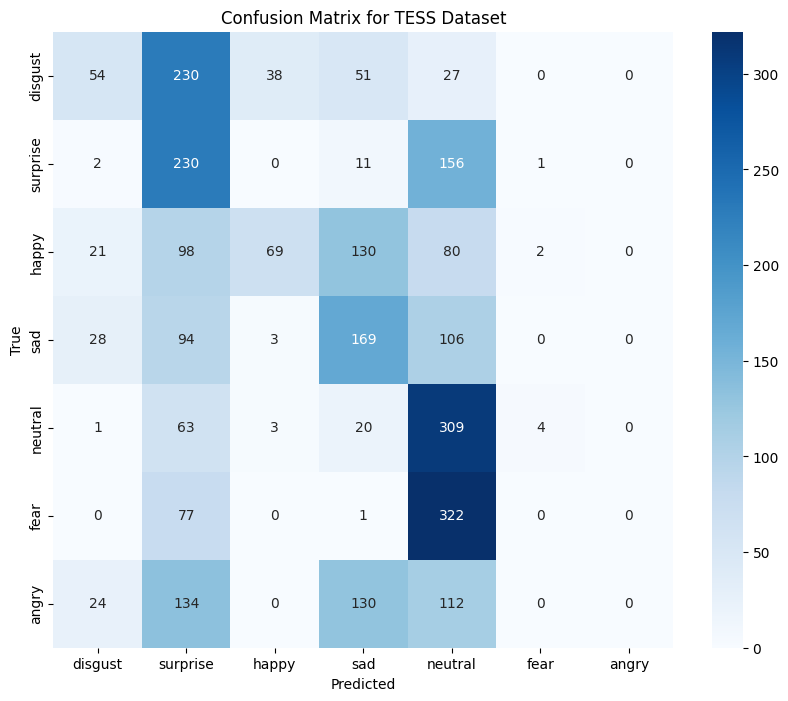

In [34]:
feats_df = pd.read_csv("features_tess.csv")

# apply the same feature scaling as for the training data
feats_df_scaled = scaler.transform(feats_df.values)
# predict with clf12 for the entire TESS dataset
tess_db['pred'] = clf12.predict(feats_df_scaled)
# Fuse labels with similar meanings
tess_db['pred'] = tess_db['pred'].replace({
    'anger': 'angry',
    'happiness': 'happy',
    'sadness': 'sad',
    'fearful' : 'fear',
    'surprise': 'surprised'
})
# Print the classification report for TESS dataset
print("Performance SVM on TESS dataset\n", classification_report(tess_db['label'], tess_db['pred'], target_names=set(tess_db['label'])))
# heatmap of confusion matrix
cm_tess = confusion_matrix(tess_db['label'], tess_db['pred'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tess, annot=True, fmt='d', cmap='Blues', xticklabels=tess_db['label'].unique(), yticklabels=tess_db['label'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TESS Dataset')
plt.show()


In [20]:
from sklearn.tree import DecisionTreeClassifier

## Simple SVM(1) classifier with feature scaling (2)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
clf12 = DecisionTreeClassifier(criterion='log_loss', max_depth=25)
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance SVM with feature scaling\n", classification_report(y_test, pred12, target_names=set(emotions)))


Performance SVM with feature scaling
               precision    recall  f1-score   support

         sad       0.51      0.51      0.51        96
       angry       0.31      0.31      0.31        71
     disgust       0.43      0.45      0.44        78
     neutral       0.34      0.35      0.35        79
       happy       0.45      0.38      0.41        53
        fear       0.51      0.51      0.51        76

    accuracy                           0.43       453
   macro avg       0.42      0.42      0.42       453
weighted avg       0.43      0.43      0.43       453



In [21]:
from sklearn.ensemble import RandomForestClassifier
clf12 = RandomForestClassifier()
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance SVM with feature scaling\n", classification_report(y_test, pred12, target_names=set(emotions)))

Performance SVM with feature scaling
               precision    recall  f1-score   support

         sad       0.70      0.76      0.73        96
       angry       0.51      0.56      0.54        71
     disgust       0.68      0.55      0.61        78
     neutral       0.59      0.52      0.55        79
       happy       0.73      0.70      0.71        53
        fear       0.61      0.70      0.65        76

    accuracy                           0.63       453
   macro avg       0.64      0.63      0.63       453
weighted avg       0.64      0.63      0.63       453



In [22]:
confusion_matrix(y_test, pred12)

array([[73, 13,  2,  7,  0,  1],
       [ 3, 40,  6,  6,  2, 14],
       [12,  4, 43,  8,  4,  7],
       [15,  9,  8, 41,  1,  5],
       [ 0,  3,  2,  4, 37,  7],
       [ 1,  9,  2,  4,  7, 53]])

In [24]:
from src.select_features import FeatureSelector, plot_feature_mask

# Create a FeatureSelector object with algorithm1 and L=0.95
L=0.88
fs = FeatureSelector(algorithm="algorithm1", L=L)
fs_scaled = FeatureSelector(algorithm="algorithm1", L=L)
# Fit the selector to both scaled and not scaled training data
fs.fit(X_train)
fs_scaled.fit(X_train_scaled)
print("Number of features selected without scaling:", len(fs.selected_indices))
X_train_sel = fs.transform(X_train)
X_test_sel = fs.transform(X_test)
X_train_scaled_sel = fs.transform(X_train_scaled)
X_test_scaled_sel = fs.transform(X_test_scaled)
print("Number of features selected with scaling:", len(fs_scaled.selected_indices))
X_train_selscaled = fs_scaled.transform(X_train)
X_test_selscaled = fs_scaled.transform(X_test)
X_train_scaled_selscaled = fs_scaled.transform(X_train_scaled)
X_test_scaled_selscaled = fs_scaled.transform(X_test_scaled)




Number of features selected without scaling: 77
Number of features selected with scaling: 77


In [25]:

## SVM(1) Algorithm1 without scaling and SVM without scaling(3)
clf13 = svm.SVC(kernel='linear')
clf13.fit(X_train_sel, y_train)
pred13 = clf13.predict(X_test_sel)
#print(classification_report(y_test, pred13, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling and SVM without scaling(3) Accuracy:", classification_report(y_test, pred13))

## SVM(1) Algorithm1 with scaling and SVM without scaling (4)
clf14 = svm.SVC(kernel='linear')
clf14.fit(X_train_selscaled, y_train)
pred14 = clf14.predict(X_test_selscaled)
#print(classification_report(y_test, pred14, target_names=set(emotions)))
print("SVM(1) Algorithm1 with scaling and SVM without scaling (4) Accuracy:", classification_report(y_test, pred14))

## SVM(1) Algorithm1 without scaling and SVM with scaling(5)
clf15 = svm.SVC(kernel='linear')
clf15.fit(X_train_scaled_sel, y_train)
pred15 = clf15.predict(X_test_scaled_sel)
#print(classification_report(y_test, pred15, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling and SVM with scaling(5) Accuracy:", classification_report(y_test, pred15))

## SVM(1) Algorithm1 with scaling and SVM with scaling (6)
clf16 = svm.SVC(kernel='linear')
clf16.fit(X_train_scaled_selscaled, y_train)
pred16 = clf16.predict(X_test_scaled_selscaled)
#print(classification_report(y_test, pred16, target_names=set(emotions)))
print("SVM(1) Algorithm1 with scaling and SVM with scaling (6) Accuracy:", classification_report(y_test, pred16))

## SVM(1) Algorithm1 without scaling but fit Scaler on selected features (7)
scaler_sel = StandardScaler()
X_train_7 = scaler_sel.fit_transform(X_train_sel)
X_test_7 = scaler_sel.transform(X_test_sel) 
clf17 = svm.SVC(kernel='linear')
clf17.fit(X_train_7, y_train)
pred17 = clf17.predict(X_test_7)
#print(classification_report(y_test, pred17, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling but fit Scaler on selected features (7) Accuracy:", classification_report(y_test, pred17))


SVM(1) Algorithm1 without scaling and SVM without scaling(3) Accuracy:               precision    recall  f1-score   support

       angry       0.69      0.67      0.68        96
     disgust       0.40      0.45      0.42        71
        fear       0.58      0.63      0.60        78
       happy       0.50      0.51      0.50        79
     neutral       0.70      0.60      0.65        53
         sad       0.61      0.57      0.59        76

    accuracy                           0.57       453
   macro avg       0.58      0.57      0.57       453
weighted avg       0.58      0.57      0.58       453

SVM(1) Algorithm1 with scaling and SVM without scaling (4) Accuracy:               precision    recall  f1-score   support

       angry       0.62      0.61      0.62        96
     disgust       0.40      0.51      0.44        71
        fear       0.56      0.67      0.61        78
       happy       0.60      0.48      0.54        79
     neutral       0.76      0.60      0.67   

L=0.95 Output: (9 emotions)
- Number of features selected without scaling: 58
- Number of features selected with scaling: 58
- SVM(1) Algorithm1 without scaling and SVM without scaling(3) Accuracy: 0.5569620253164557
- SVM(1) Algorithm1 with scaling and SVM without scaling (4) Accuracy: 0.5417721518987342
- SVM(1) Algorithm1 without scaling and SVM with scaling(5) Accuracy: 0.529113924050633
- SVM(1) Algorithm1 with scaling and SVM with scaling (6) Accuracy: 0.5594936708860759

              precision    recall  f1-score   support

         sad       0.71      0.62      0.67        96
       angry       0.49      0.55      0.52        71
     disgust       0.67      0.72      0.69        78
     neutral       0.51      0.47      0.49        79
       happy       0.70      0.70      0.70        53
        fear       0.58      0.62      0.60        76

    accuracy                           0.61       453
   macro avg       0.61      0.61      0.61       453
weighted avg       0.61      0.61      0.61       453



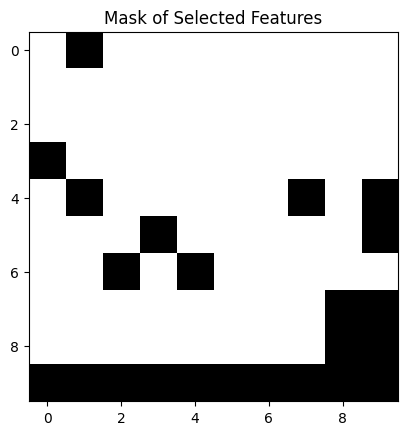

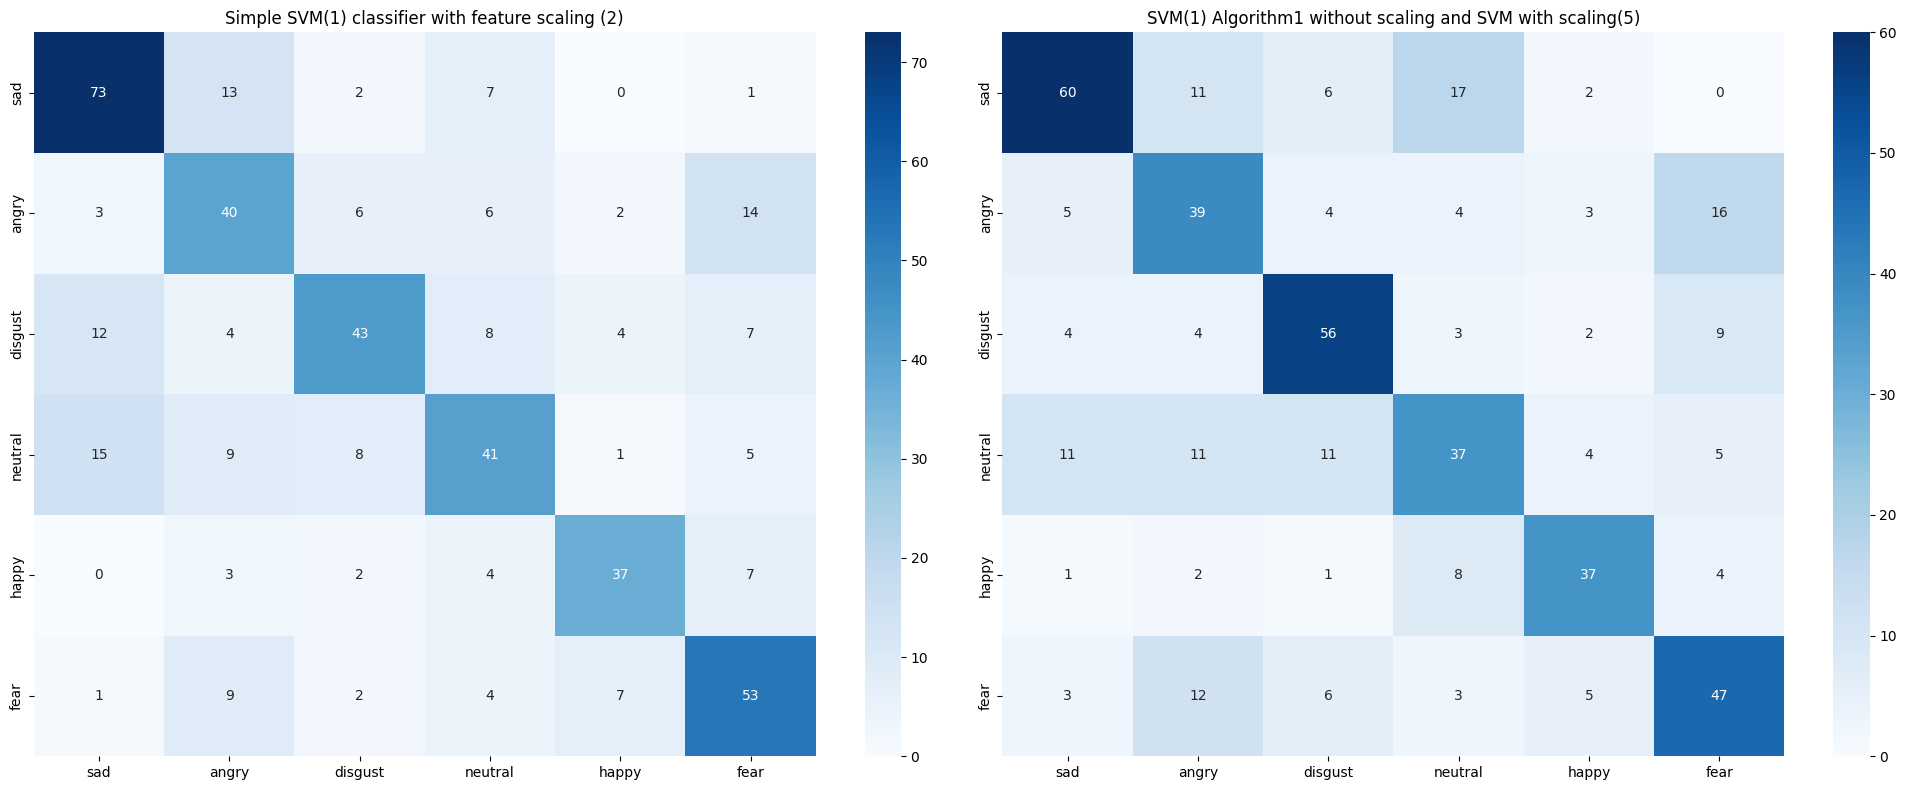

In [26]:
import seaborn as sns
import numpy as np

emo_set = set(emotions)

print(classification_report(y_test, pred15, target_names=set(emotions)))

n_total_features = X_train.shape[1]
mask = np.zeros(n_total_features)
mask[fs.selected_indices] = 1
plot_feature_mask(mask, 'Mask of Selected Features')

# Comparison
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(confusion_matrix(y_test, pred12), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=emo_set,
            yticklabels=emo_set,
            ax=ax[0])
ax[0].set_title('Simple SVM(1) classifier with feature scaling (2)')
sns.heatmap(confusion_matrix(y_test, pred15), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=emo_set,
            yticklabels=emo_set,
            ax=ax[1])
ax[1].set_title('SVM(1) Algorithm1 without scaling and SVM with scaling(5)')
plt.tight_layout()
plt.show()

In [19]:
L=0.7
fs = FeatureSelector(algorithm="algorithm1", L=L)
fs.fit(X_train)
print("Number of features selected without scaling:", len(fs.selected_indices))
X_train_sel = fs.transform(X_train)
X_test_sel = fs.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_sel = fs.transform(X_train_scaled)
X_test_scaled_sel = fs.transform(X_test_scaled)

NameError: name 'FeatureSelector' is not defined

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled_sel, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1

In [55]:
grid.best_params_, grid.best_estimator_, grid.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 SVC(C=10, gamma=0.01),
 0.6299921127533349)

## Random Forest

In [56]:
## random forest
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_sel, y_train)
pred_rf = rf.predict(X_test_scaled_sel)
print("Performance Random Forest\n", classification_report(y_test, pred_rf, target_names=set(emotions)))


Performance Random Forest
               precision    recall  f1-score   support

       happy       0.75      0.81      0.78        72
         sad       0.41      0.46      0.44        41
       angry       0.65      0.51      0.57        51
     disgust       0.69      0.63      0.66        49
        fear       0.74      0.63      0.68        41
     neutral       0.63      0.77      0.69        48

    accuracy                           0.65       302
   macro avg       0.65      0.64      0.64       302
weighted avg       0.66      0.65      0.65       302



In [57]:
## GridSearchCV for Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid_rf.fit(X_train_scaled_sel, y_train)

grid_rf.best_params_, grid_rf.best_estimator_, grid_rf.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_sample

({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 RandomForestClassifier(max_depth=30, n_estimators=200),
 0.6449058674256712)

## CNN 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Split training portion into 80% training and 20% validation
X_train_nn, X_val, y_train_nn, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=30, shuffle=True, stratify=y_train
)

# Check the shapes of the resulting datasets
print("Shapes:")
print("Training set:", X_train_nn.shape )
print("Validation set:", X_val.shape)
print("Testing set:", X_test.shape)


Shapes:
Training set: (966, 62)
Validation set: (242, 62)
Testing set: (302, 62)


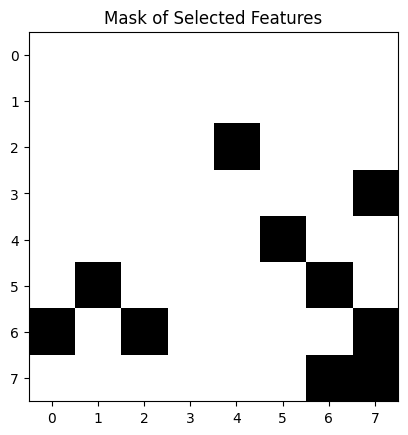

In [33]:
#!pip install tensorflow
#import tensorflow as tf
from select_features import FeatureSelector, plot_feature_mask
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense


# Feature selector
selector = FeatureSelector(algorithm='algorithm1', L=0.88)
selector.fit(X_train_nn)

# Plot mask
n_total_features = X_train_nn.shape[1]
mask = np.zeros(n_total_features)
mask[selector.selected_indices] = 1
plot_feature_mask(mask, 'Mask of Selected Features')

# Apply selection (Algorthm 1)
X_train_sel = selector.transform(X_train_nn)
X_test_sel = selector.transform(X_test)
X_val_sel = selector.transform(X_val)

# Normalize features
scaler = StandardScaler()
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)
X_val_sel = scaler.transform(X_val_sel)

# Apply selection (Algorthm 2)
selector = FeatureSelector(algorithm='algorithm2', L=0.95, MS=0.8)
selector.fit(X_train_sel)
X_train_sel = selector.transform(X_train_sel)
X_test_sel = selector.transform(X_test_sel)
X_val_sel = selector.transform(X_val_sel)
# Reshape the data to include the channel dimension
#X_train = X_train_sel.reshape(X_train.shape[0], X_train.shape[1], 1)  # Shape: (5285, 242, 1)
#X_test = X_test_sel.reshape(X_test.shape[0], X_test.shape[1], 1)      # Shape: (1510, 242, 1)



In [45]:
# Define the model
model = Sequential()

# First Conv1D Block
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train_sel.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Second Conv1D Block
#model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

# LSTM Layers
model.add(LSTM(32, return_sequences=True)) 
model.add(Dropout(0.3))
#model.add(LSTM(128, return_sequences=True)) 
#model.add(Dropout(0.3))
model.add(LSTM(32)) 
model.add(Dropout(0.3))

# Fully Connected Dense Layers
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output Layer (9 classes)
model.add(Dense(1, activation='softmax'))  # Assuming 6 emotion classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 46, 64)            384       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 23, 64)            0         
 ng1D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 23, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 23, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 23, 32)            12416     
                                                                 
 dropout_28 (Dropout)        (None, 23, 32)           

In [46]:
# Encode labels using dictionary
label_map = {label: i for i, label in enumerate(y_train_nn.unique())}
y_train_enc = np.array([label_map[label] for label in y_train_nn])
y_val_enc = np.array([label_map[label] for label in y_val])
y_test_enc = np.array([label_map[label] for label in y_test])

y_train_nn.unique()

array(['angry', 'sad', 'happy', 'neutral', 'fear', 'disgust'],
      dtype=object)

In [47]:
import tensorflow as tf
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(
    X_train_sel, y_train_enc,
    validation_data=(X_val_sel, y_val_enc),
    epochs=5,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    
)


Epoch 1/5
121/121 [==============================] - 8s 26ms/step - loss: 0.0000e+00 - accuracy: 0.1708 - val_loss: 0.0000e+00 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 2/5
121/121 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1708 - val_loss: 0.0000e+00 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 3/5
121/121 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1708 - val_loss: 0.0000e+00 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 4/5
121/121 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1708 - val_loss: 0.0000e+00 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 5/5
121/121 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1708 - val_loss: 0.0000e+00 - val_accuracy: 0.1694 - lr: 2.0000e-04


In [ ]:

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test_enc)
print("Test Accuracy:", accuracy)
print(classification_report(y_test_enc, model.predict(X_test), target_names=set(emotions)))

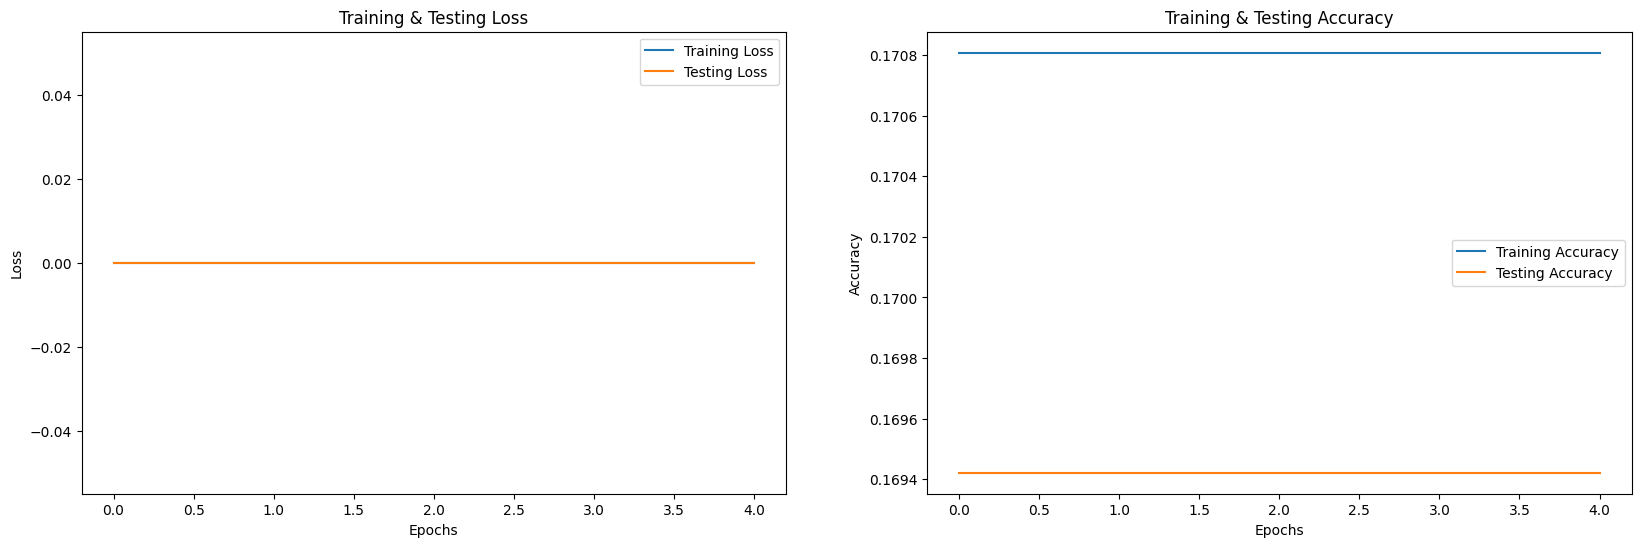

In [15]:
# Dynamically generate the epochs array based on the training history
epochs = [i for i in range(len(history.history['loss']))]

# Create subplots
fig, ax = plt.subplots(1, 2)

# Extract metrics from the history object
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Set figure size
fig.set_size_inches(20, 6)

# Plot Training & Testing Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

# Plot Training & Testing Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

# Show the plots
plt.show()